## Training of models
1. Bagging
2. Random Forest
3. Adaboost
4. Logistic Regression <br>
    i.  L1 Regularization <br>
    ii. L2 Regulatization

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import math
from copy import deepcopy
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("churn_processed.csv")

In [3]:
df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,7590-VHVEG,0,0,1,0,0.000000,0,1,0.115423,...,1,0,0,1,0,0,0,0,1,0
1,1,5575-GNVDE,1,0,0,0,0.464789,1,0,0.385075,...,1,0,0,0,1,0,0,0,0,1
2,2,3668-QPYBK,1,0,0,0,0.014085,1,1,0.354229,...,1,0,0,1,0,0,0,0,0,1
3,3,7795-CFOCW,1,0,0,0,0.619718,0,0,0.239303,...,1,0,0,0,1,0,1,0,0,0
4,4,9237-HQITU,0,0,0,0,0.014085,1,1,0.521891,...,1,0,0,1,0,0,0,0,1,0


In [4]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.fillna(0)

In [5]:
variables = list(df.columns)
variables.remove('customerID')
variables.remove('Churn')
print(variables)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
import random

In [7]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [9]:
kfold_perf = {}
train_test_perf = {}
all_models = []
variables = df.columns
variables = variables.drop("Churn")
variables = variables.drop('customerID')

In [8]:
kf = StratifiedKFold(n_splits=5, random_state=12345)

## Bagging

Confusion matrix, without normalization
[[1343  190]
 [ 332  245]]
[[1343  190]
 [ 332  245]]
Accuracy:  0.75260663507109
Area Under Curve Score : 0.650335032519691
Sensitivity : 0.4246100519930676


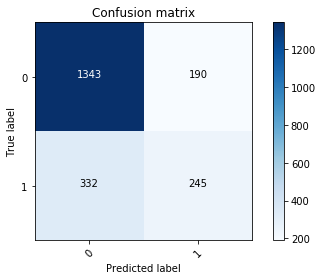

In [10]:
X = df[variables]
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Fit Bagging Model; A bundle of decision trees
# Just wait a minute...It will take some time
BA = BaggingClassifier(n_estimators=100, random_state=12345)
BA_model = BA.fit(X_train, y_train)
BA_model.classes_
# Validation
y_pred = BA_model.predict(X_test)

all_models += [["Bagging", BA_model]]

# Performance of decision tree model
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0,1])
print(cm)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Area Under Curve Score : " + str(roc_auc_score(y_test,y_pred)))
print("Sensitivity :", recall_score(y_test,y_pred))
train_test_perf["Bagging"] = {accuracy_score(y_test, y_pred), roc_auc_score(y_test,y_pred), recall_score(y_test,y_pred)}

In [11]:
# Model 2: Bagging method
bagging = BaggingClassifier(n_estimators=100, random_state=12345)

# Cross validation on Model 2
cv_model_2 = cross_val_score(bagging, # Cross-validation on Model 2
                             X_train, # Feature matrix
                             y_train, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='roc_auc' # Model performance metrics: accuracy
                            )

# Report performance of Model 2
print("Bagging model: %s" %(cv_model_2.mean()))
kfold_perf["Bagging"] = cv_model_2.mean()

Bagging model: 0.7983912607591255


## Random Forest

Confusion matrix, without normalization
[[1367  166]
 [ 343  234]]
[[1367  166]
 [ 343  234]]
Accuracy:  0.7587677725118483
Area Under Curve Score : 0.6486307587777164
Sensitivity : 0.4055459272097054


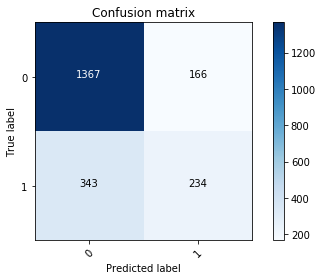

In [12]:
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)
RF_model = RF.fit(X_train, y_train)
RF_model.classes_
# Validation
y_pred = RF_model.predict(X_test)

all_models += [["Random Forest", RF_model]]

# Performance of decision tree model
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0,1])
print(cm)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Area Under Curve Score : " + str(roc_auc_score(y_test,y_pred)))
print("Sensitivity :", recall_score(y_test,y_pred))
train_test_perf["Random Forest"] = {accuracy_score(y_test, y_pred), roc_auc_score(y_test,y_pred), recall_score(y_test,y_pred)}

In [13]:
# Model 3: Random Forest method
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)

# Cross validation on Model 3
cv_model_3 = cross_val_score(random_forest, # Cross-validation on Model 3
                             X_train, # Feature matrix
                             y_train, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='roc_auc' # Model performance metrics: roc
                            )

# Report performance of Model 3
print("Random Forest model: %s" %(cv_model_3.mean()))
kfold_perf["Random Forest"] = cv_model_3.mean()

Random Forest model: 0.8057210563024517


## AdaBoosting

[[1367  166]
 [ 291  286]]
Confusion matrix, without normalization
[[1367  166]
 [ 291  286]]
Accuracy:  0.7834123222748816
Area Under Curve Score : 0.6936914173565726
Sensitivity : 0.49566724436741766


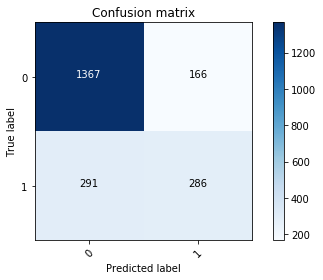

In [14]:
Ada = AdaBoostClassifier(n_estimators=100, random_state=12345)
Ada_model = Ada.fit(X_train, y_train)
Ada_model.classes_
y_pred = Ada_model.predict(X_test)

all_models += [["AdaBoost", Ada_model]]

# Performance of decision tree model
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm, [0,1])
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Area Under Curve Score : " + str(roc_auc_score(y_test,y_pred)))
print("Sensitivity :", recall_score(y_test,y_pred))
train_test_perf["Adaboosting"] = {accuracy_score(y_test, y_pred), roc_auc_score(y_test,y_pred), recall_score(y_test,y_pred)}

In [15]:
# Model 4: AdaBoosting method
Adaboost = AdaBoostClassifier(n_estimators=100, random_state=12345)

# Cross validation on Model 4
cv_model_4 = cross_val_score(Adaboost, # Cross-validation on Model 4
                             X_train, # Feature matrix
                              y_train, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='roc_auc' # Model performance metrics: roc
                            )

# Report performance of Model 4
print("AdaBoosting model: %s" %(cv_model_4.mean()))
kfold_perf["AdaBoosting"] = cv_model_4.mean()

AdaBoosting model: 0.8152369916111988


# Logistic Regression (Best Performing)

[[1371  162]
 [ 272  305]]
Confusion matrix, without normalization
[[1371  162]
 [ 272  305]]
Accuracy:  0.7943127962085308
Area Under Curve Score : 0.711460520202003
Sensitivity : 0.5285961871750433


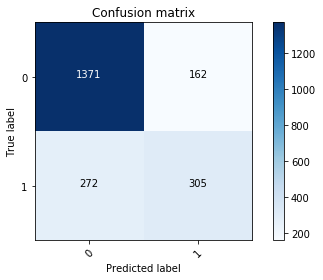

In [17]:
lr = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l1', C=100, random_state=0)
lr.fit(X=X_train, y=y_train)
y_pred = lr.predict(X_test)

all_models += [["LogRegress 1", lr]]

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm, [0,1])
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Area Under Curve Score : " + str(roc_auc_score(y_test,y_pred)))
print("Sensitivity :", recall_score(y_test,y_pred))
train_test_perf["LogRegress1"] = {accuracy_score(y_test, y_pred), roc_auc_score(y_test,y_pred), recall_score(y_test,y_pred)}

Confusion matrix, without normalization
[[1372  161]
 [ 272  305]]
[[1372  161]
 [ 272  305]]
Accuracy:  0.79478672985782
Area Under Curve Score : 0.7117866780624075
Sensitivity : 0.5285961871750433


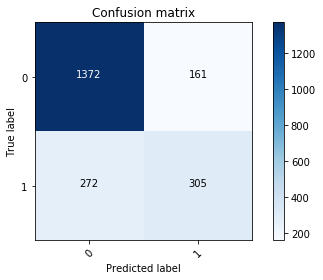

In [16]:
lr = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=0)
lr.fit(X=X_train, y=y_train)
y_pred = lr.predict(X_test)

all_models += [["LogRegress 2", lr]]

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0,1])
print(cm)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Area Under Curve Score : " + str(roc_auc_score(y_test,y_pred)))
print("Sensitivity :", recall_score(y_test,y_pred))
train_test_perf["LogRegress2"] = {accuracy_score(y_test, y_pred), roc_auc_score(y_test,y_pred), recall_score(y_test,y_pred)}

In [18]:
# Model 1: Logistic regression with L2 regularization
model_L1 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=12345)

# Model 2: Logistic regression with L1 regularization (Let's use the same parameter values as Model 1, except penalty)
model_L2 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l1', C=100, random_state=12345)

# Cross-validation on Model 1
cv_model_5 = cross_val_score(model_L1, # Cross-validation on model_5
                             X_train, # Feature matrix
                             y_train, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='roc_auc' # Model performance metrics: roc
                            )

# Cross-validation on Model 2
cv_model_6 = cross_val_score(model_L2, # Cross-validation on model_6
                             X_train, # Feature matrix
                             y_train, # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='roc_auc' # Model performance metrics: r0c
                            )

# Report average cross-validation accuracy of Model 1
print("Average accuracy Model 1 : " + str(np.mean(cv_model_5)))
kfold_perf["LogRegress_L1"] = cv_model_5.mean()

# Report average cross-validation accuracy of Model 2
print("Average accuracy Model 2 : " + str(np.mean(cv_model_6)))
kfold_perf["LogRegress_L2"] = cv_model_6.mean()

Average accuracy Model 1 : 0.8289215384352806
Average accuracy Model 2 : 0.8289236698327607


In [19]:
print("Baseline Model prediction accuracy is :" + str(1 - df.Churn.mean()))
print("Baseline Model is what is achieved when all the data is predicted as No Churn")
print("")

print(kfold_perf)
print("")
print("Accuracy", "AUC", "Sensitivity")
for pairs in train_test_perf.items():
    print(pairs[0], pairs[1])

Baseline Model prediction accuracy is :0.7342150170648465
Baseline Model is what is achieved when all the data is predicted as No Churn

{'Bagging': 0.7983912607591255, 'Random Forest': 0.8057210563024517, 'AdaBoosting': 0.8152369916111988, 'LogRegress_L1': 0.8289215384352806, 'LogRegress_L2': 0.8289236698327607}

Accuracy AUC Sensitivity
Bagging {0.75260663507109, 0.650335032519691, 0.4246100519930676}
Random Forest {0.7587677725118483, 0.6486307587777164, 0.4055459272097054}
Adaboosting {0.7834123222748816, 0.6936914173565726, 0.49566724436741766}
LogRegress2 {0.79478672985782, 0.7117866780624075, 0.5285961871750433}
LogRegress1 {0.7943127962085308, 0.711460520202003, 0.5285961871750433}


In [20]:
rf_model = all_models[1][1]
boost_model = all_models[2][1]
log_model = all_models[3][1]
rf_features = rf_model.feature_importances_
boost_features = boost_model.feature_importances_
log_features = log_model.coef_[0]

In [21]:
print("Significant values for Random Forest")
for i in range(len(rf_features)):
    if rf_features[i] > 0.05:
        print(variables[i], rf_features[i])

print(" ")
print("Significant values for Boosting")
for i in range(len(boost_features)):
    if boost_features[i] > 0.03:
        print(variables[i], boost_features[i])

print(" ")
print("Significant values for Logistic Regression")
for i in range(len(log_features)):
    if log_features[i] > 0.6 or log_features[i] < -0.6:
        print(variables[i], log_features[i])

Significant values for Random Forest
tenure 0.12015139107558008
MonthlyCharges 0.14262436945098828
TotalCharges 0.14273197194099474
Contract_Month-to-month 0.06713165874476416
 
Significant values for Boosting
tenure 0.11
MonthlyCharges 0.27
TotalCharges 0.41
 
Significant values for Logistic Regression
Contract_Month-to-month 0.9985440129602221
Contract_Two year -1.2322914753790433


Other data that might be useful
1. Timeline of customer churn to detect any anomalies. Perhaps other companies (like Singapore's Circles Life) might give good offers all of a sudden, which could entice other customers to churn.
2. Time other telcos entered.
3. More information about the deal plans. How much data they got. This would be useful as a gauge to how cheap the phone is.
4. The nature of the contract. Individual, is it under corporate insurance etc.
5. Specific age group of the individual. Youngsters may change frequently depending on deals, adults may stick to corporate plans under their company, and perhaps senior citizens could be covered under similar corporate plans as well.
6. Complaints information. Has the customer complained before?